In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('/content/creditcard.csv')

In [3]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45646 entries, 0 to 45645
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    45646 non-null  int64  
 1   V1      45646 non-null  float64
 2   V2      45646 non-null  float64
 3   V3      45646 non-null  float64
 4   V4      45646 non-null  float64
 5   V5      45646 non-null  float64
 6   V6      45645 non-null  float64
 7   V7      45645 non-null  float64
 8   V8      45645 non-null  float64
 9   V9      45645 non-null  float64
 10  V10     45645 non-null  float64
 11  V11     45645 non-null  float64
 12  V12     45645 non-null  float64
 13  V13     45645 non-null  float64
 14  V14     45645 non-null  float64
 15  V15     45645 non-null  float64
 16  V16     45645 non-null  float64
 17  V17     45645 non-null  float64
 18  V18     45645 non-null  float64
 19  V19     45645 non-null  float64
 20  V20     45645 non-null  float64
 21  V21     45645 non-null  float64
 22

In [5]:
print(data['Class'].value_counts())

Class
0.0    45503
1.0      142
Name: count, dtype: int64


In [6]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])


In [9]:
# Separate the minority and majority classes
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

# Undersample the majority class
non_fraud_sample = non_fraud.sample(n=len(fraud), random_state=42)

# Combine the minority class with the undersampled majority class
undersampled_data = pd.concat([fraud, non_fraud_sample])

# Check for NaN values
if undersampled_data.isnull().sum().any():
    print("NaN values found. Handling NaN values.")
    undersampled_data = undersampled_data.dropna()

In [12]:
# Separate features and target
X_undersampled = undersampled_data.drop('Class', axis=1)
y_undersampled = undersampled_data['Class']

In [13]:
# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.3, random_state=42)

In [14]:
# Step 5: Train a Classification Algorithm
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [15]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [16]:
# Evaluation for Logistic Regression
log_reg_report = classification_report(y_test, y_pred_log_reg)

# Evaluation for Random Forest Classifier
rf_report = classification_report(y_test, y_pred_rf)

# Calculate Precision, Recall, F1-score
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

log_reg_report, rf_report, precision_log_reg, recall_log_reg, f1_log_reg, precision_rf, recall_rf, f1_rf


('              precision    recall  f1-score   support\n\n         0.0       0.95      0.95      0.95        42\n         1.0       0.95      0.95      0.95        44\n\n    accuracy                           0.95        86\n   macro avg       0.95      0.95      0.95        86\nweighted avg       0.95      0.95      0.95        86\n',
 '              precision    recall  f1-score   support\n\n         0.0       0.98      1.00      0.99        42\n         1.0       1.00      0.98      0.99        44\n\n    accuracy                           0.99        86\n   macro avg       0.99      0.99      0.99        86\nweighted avg       0.99      0.99      0.99        86\n',
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 1.0,
 0.9772727272727273,
 0.9885057471264368)

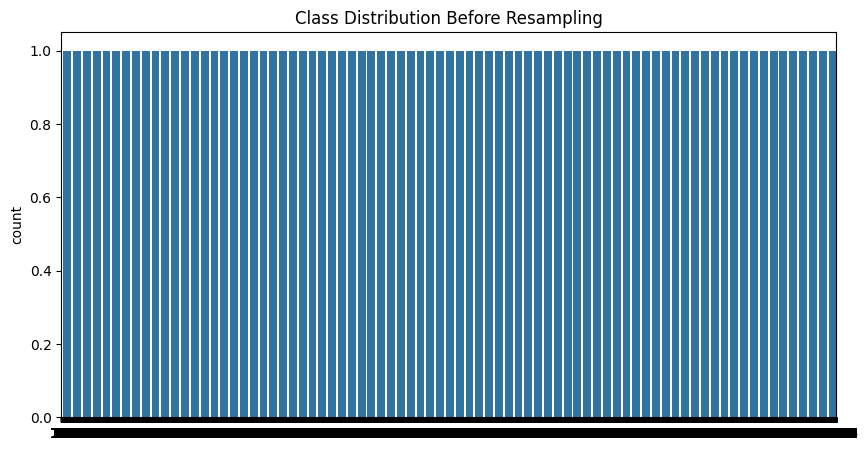

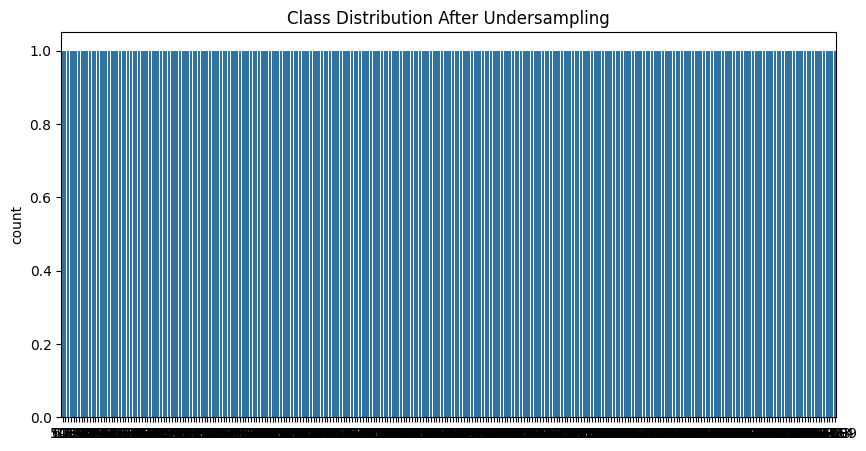

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution before resampling
plt.figure(figsize=(10, 5))
sns.countplot(data['Class'])
plt.title('Class Distribution Before Resampling')
plt.show()

# Class distribution after undersampling
plt.figure(figsize=(10, 5))
sns.countplot(undersampled_data['Class'])
plt.title('Class Distribution After Undersampling')
plt.show()


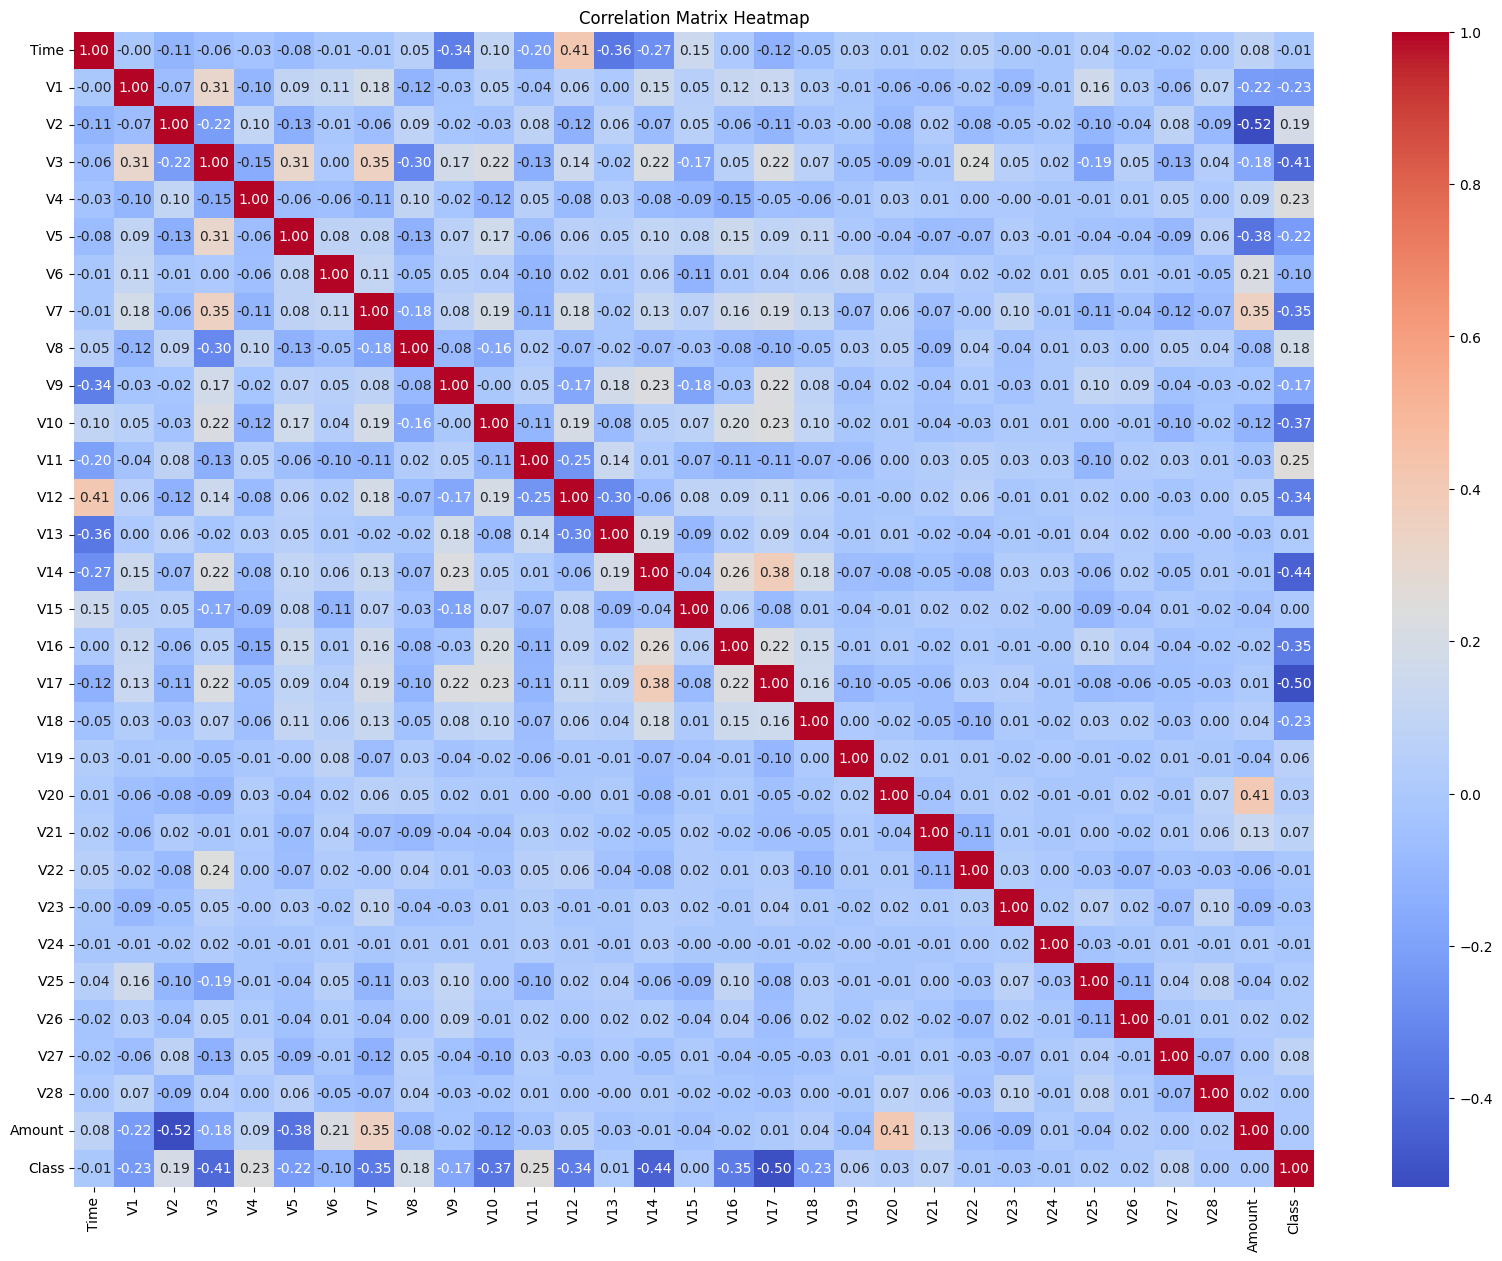

In [18]:
# Correlation matrix
plt.figure(figsize=(20, 15))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

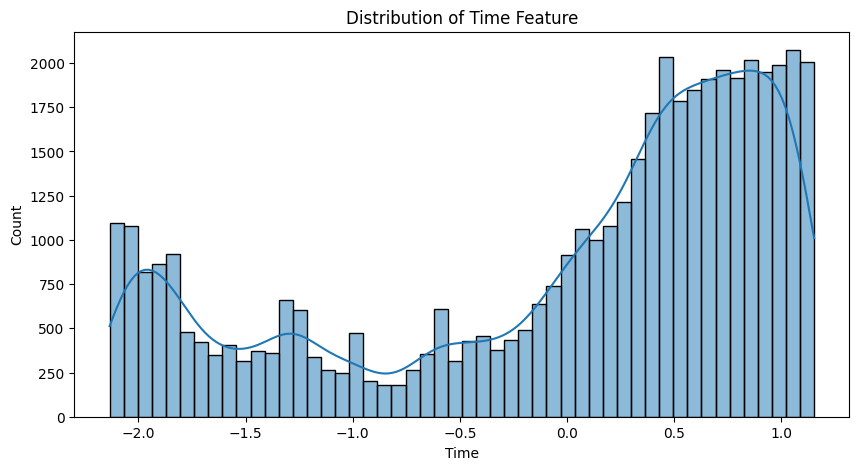

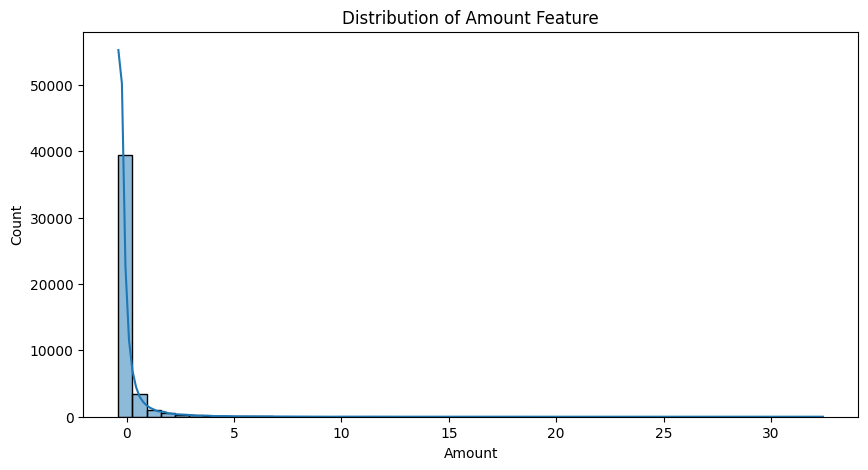

In [19]:
# Distribution of Time feature
plt.figure(figsize=(10, 5))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Distribution of Time Feature')
plt.show()

# Distribution of Amount feature
plt.figure(figsize=(10, 5))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount Feature')
plt.show()

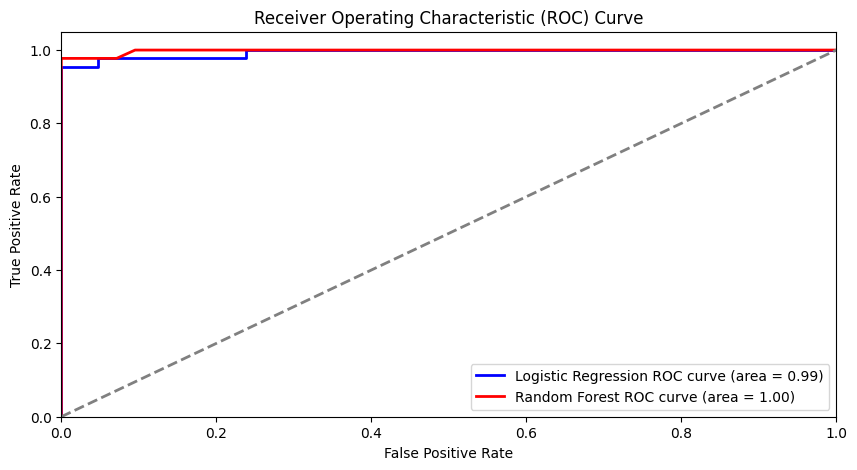

In [20]:
from sklearn.metrics import roc_curve, auc

# ROC Curve for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

plt.figure(figsize=(10, 5))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_log_reg)

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
